<a href="https://colab.research.google.com/github/shadab4150/Deep-Learning-Classifiers/blob/master/wood_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> WoodNet</h1></center>
<center><h2> Wood classifier </h2></center> 
<center><h3> Groups [ mahogany, oak , walnut, rosewood, pine ]</h3></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Dataset downloaded and cleaned from google images.
* Using below library and functions
* Uncomment if you want to use the function

In [0]:
# Run this command in shell to download the library
# pip install google_images_download

#from google_images_download import google_images_download  

#response = google_images_download.googleimagesdownload()   

# Below enter your images  tags --> for example - oak wood, pine wood, etc, 
# limit = number of images you want to download

#arguments = {"keywords":"oak wood,rosewood wood,","limit":50,"print_urls":True}  

#paths = response.download(arguments)   

# prints the paths to where images are being  downloaded

#print(paths)

In [0]:
from fastai.vision import *
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg


In [0]:
path=Path('/content/drive/My Drive/woods')

In [7]:
path.ls()

[PosixPath('/content/drive/My Drive/woods/oak_wood'),
 PosixPath('/content/drive/My Drive/woods/rosewood_wood'),
 PosixPath('/content/drive/My Drive/woods/pine_wood'),
 PosixPath('/content/drive/My Drive/woods/walnut_wood'),
 PosixPath('/content/drive/My Drive/woods/mahogany_wood')]

In [0]:
classes = ['oak wood','rose wood','pine wood','walnut wood','mahogany wood']

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['mahogany_wood', 'oak_wood', 'pine_wood', 'rosewood_wood', 'walnut_wood']

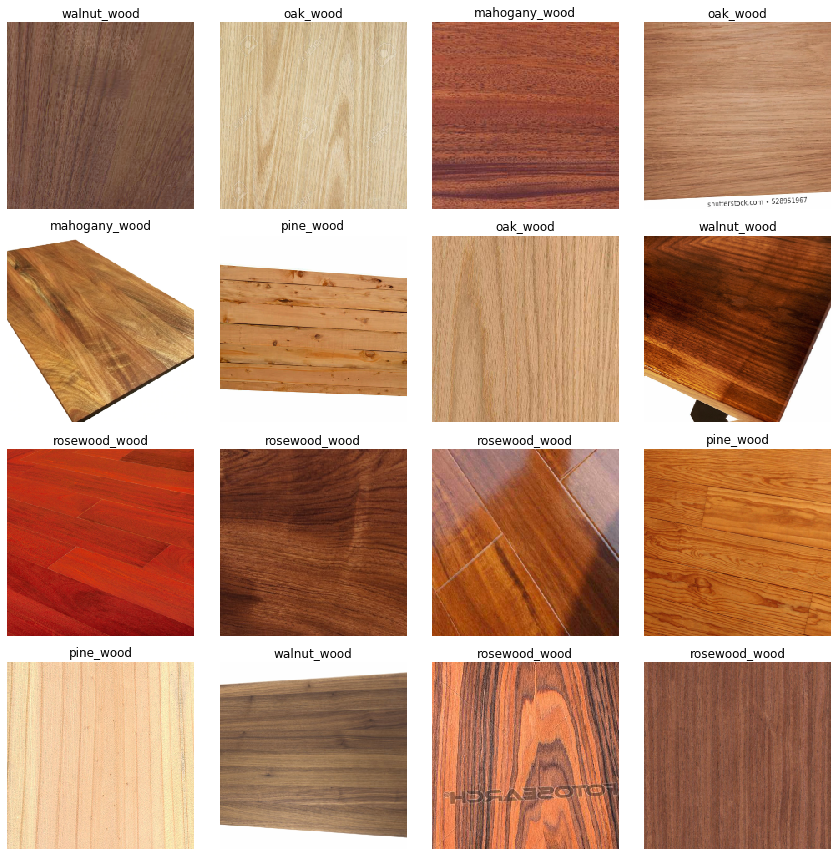

In [10]:
data.show_batch(rows=4, figsize=(12,12))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['mahogany_wood', 'oak_wood', 'pine_wood', 'rosewood_wood', 'walnut_wood'],
 5,
 172,
 42)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 27.9MB/s]


In [13]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.504464,2.286728,0.880952,00:31
1,2.472444,2.285260,0.690476,00:08
2,2.079425,1.848877,0.476190,00:07
3,1.835986,1.604629,0.404762,00:07
4,1.609394,1.608812,0.404762,00:06
5,1.447434,1.658190,0.452381,00:06
6,1.301546,1.625683,0.428571,00:06
7,1.203867,1.612611,0.404762,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-04


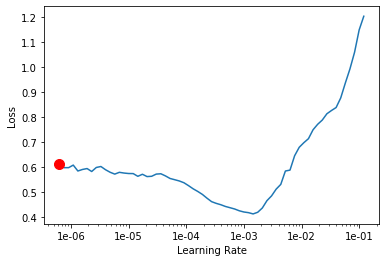

In [20]:
learn.recorder.plot(suggestion=True,)

In [23]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.329560,1.398607,0.333333,00:06
1,0.280137,1.333769,0.309524,00:07


## Setting the learning rate to decrease Loss
### And Training two more cycles 

# We have achieved an accuracy rate of 70 %.
* Given all wood give almost same color after painting so it's a little difficult to tell by just seeing it without it touch and robustness 

In [0]:
learn.save('stage-3')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

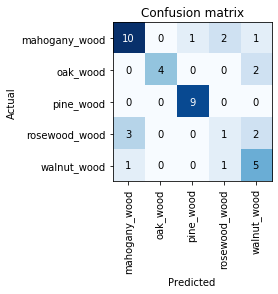

In [26]:
interp.plot_confusion_matrix()

In [27]:
#interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

# Prediction vs actual Loss

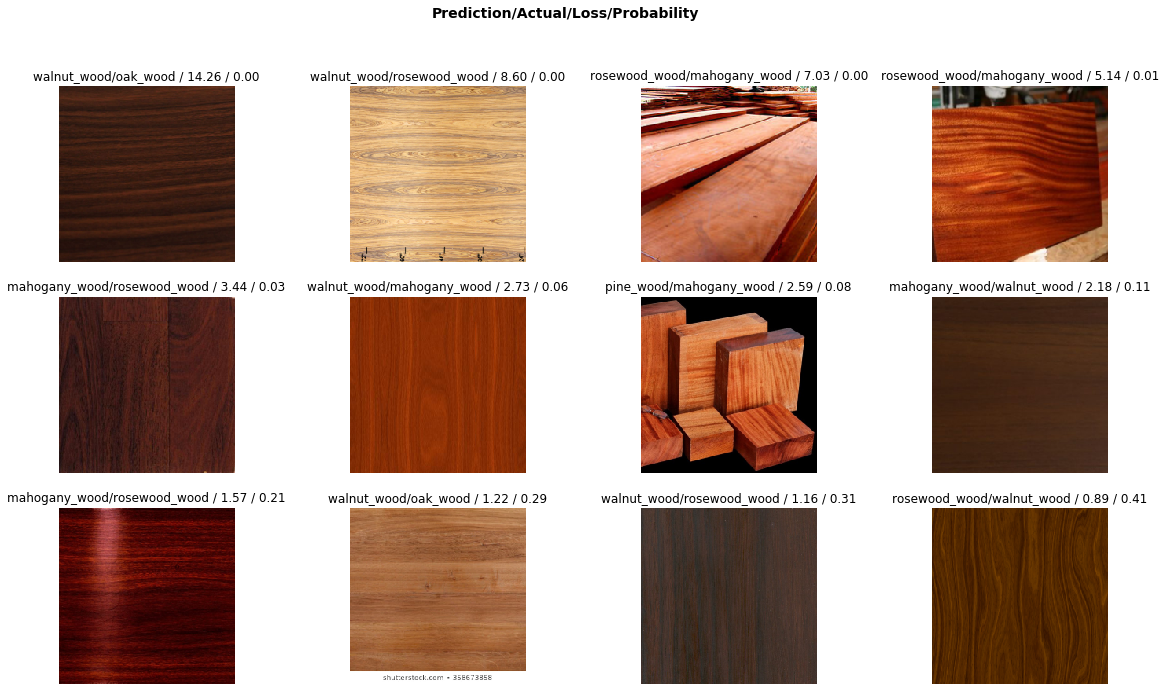

In [42]:
interp.plot_top_losses(12, figsize=(20,11))

In [29]:
interp.most_confused(min_val=2)

[('rosewood_wood', 'mahogany_wood', 3),
 ('mahogany_wood', 'rosewood_wood', 2),
 ('oak_wood', 'walnut_wood', 2),
 ('rosewood_wood', 'walnut_wood', 2)]

# Exporting the model for production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

# Loading the model for checking with google searched images

In [0]:
learn = load_learner(path)

prediction : mahogany_wood


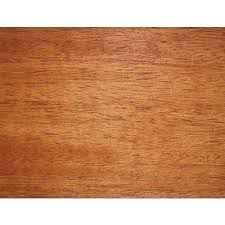

In [34]:
img1 = open_image('/content/maho.jpg')
pred_class,pred_idx,outputs = learn.predict(img1)
print("prediction : "+str(pred_class))
img1

# Creating a loop to check faster 
* **arr** contains location of images

In [0]:
arr=['/content/pine.jpg','/content/walnut1.jpg','/content/pine1.jpg','/content/rose1.jpg','/content/oak12.jpg','/content/maho.jpg','/content/rose.jpg']

actual: pine
prediction : oak_wood


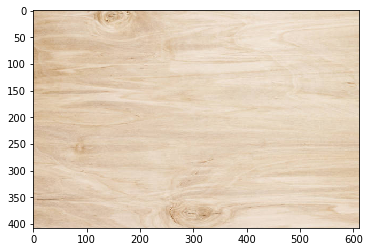

actual: walnut1
prediction : walnut_wood


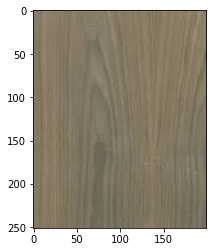

actual: pine1
prediction : pine_wood


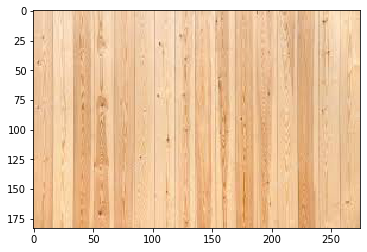

actual: rose1
prediction : rosewood_wood


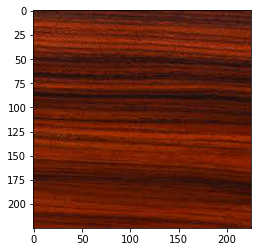

actual: oak12
prediction : oak_wood


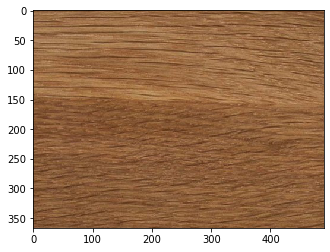

actual: maho
prediction : mahogany_wood


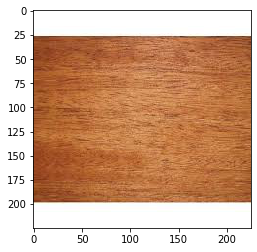

actual: rose
prediction : mahogany_wood


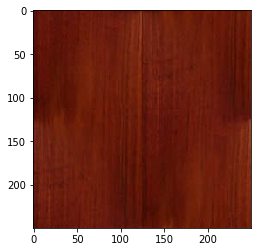

In [71]:
for i in arr:
  imgK=open_image(i)
  pred_class,pred_idx,outputs = learn.predict(imgK)
  print('actual: '+str(i[9:-4]))
  print("prediction : "+str(pred_class))
  img=mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.show()